<a href="https://colab.research.google.com/github/enriqueasegura/Quantum-X/blob/master/Qiskit_Cirque_do_VQE_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

In [0]:
import numpy as np
from random import random
from scipy import array
from scipy.optimize import minimize
from qiskit import *
from qiskit.visualization import plot_histogram

%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [0]:
from qiskit.aqua.operators import WeightedPauliOperator
from qiskit.aqua.algorithms import ExactEigensolver
from qiskit import BasicAer
from qiskit.aqua.algorithms import VQE
from qiskit.aqua.components.variational_forms import RYRZ
from qiskit.aqua.components.optimizers import L_BFGS_B

#let's use the nice easy 

In [0]:
def toy_ansatz(yparam):
  circuit = QuantumCircuit(1,1)
  q = circuit.qregs[0]
  c = circuit.cregs[0]
  circuit.ry(yparam, q[0])
  circuit.measure(q[0], c[0])
  return circuit

In [0]:
def get_or_else_zero(d: dict, key: str):
    """
    Utility for working with dictionaries. If key is missing
    than return 0 otherwise the corresponding value.
    :param dict: the dictionary.
    :param key: key (string) in interest.
    :return: 0 or value of corresponding key.
    """
    value = 0
    if key in d:
        value = d[key]
    return value

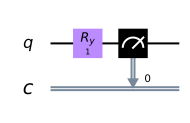

In [105]:
test_circuit =toy_ansatz(1)
test_circuit.draw(output='mpl')

In [0]:
angle_range = np.linspace(0, 2*np.pi,1000)

num_reps = 1000

pred_arr =[]



for i in angle_range:
  curr_circuit = toy_ansatz(yparam=i)

  emulator = Aer.get_backend('qasm_simulator')
  #simulate the circuit
  shot_num=1000
  job = execute(curr_circuit, emulator, shots=shot_num, memory=True)
    
  counts = job.result().get_counts()

  expectation_value = (get_or_else_zero(counts, '0') - get_or_else_zero(counts,'1')) / shot_num

  pred_arr.append(expectation_value)

In [0]:
import matplotlib.pyplot as plt

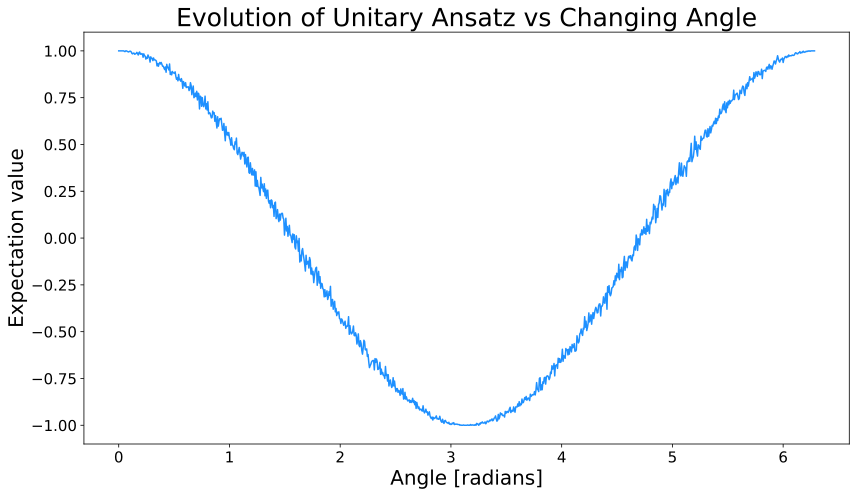

In [132]:
plt.figure(figsize=(12,7))

plt.plot(angle_range, pred_arr, color='dodgerblue')

plt.xlabel('Angle [radians]', fontsize=20)
plt.ylabel('Expectation value', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

plt.title('Evolution of Unitary Ansatz vs Changing Angle', fontsize=25)
plt.tight_layout()

In [0]:
def ansatz(paramx, paramy):
  circuit = QuantumCircuit(1,1)
  q = circuit.qregs[0]
  c = circuit.cregs[0]
  circuit.rx(paramx, q[0])
  circuit.ry(paramy, q[0])
  return circuit

In [0]:
ansatz_circuit = ansatz(1, .5)

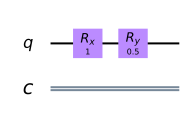

In [123]:
ansatz_circuit.draw(output='mpl')

In [0]:
def z_measurement(paramx, paramy, circuit):
  circuit = QuantumCircuit(1,1)
  q = circuit.qregs[0]
  c = circuit.cregs[0]
  #curr_ansatz = ansatz(paramx, paramy, circuit)
  circuit.rx(paramx, q[0])
  circuit.ry(paramy, q[0])
  
  circuit.measure(q[0], c[0])
  return circuit

def x_measurement(paramx, paramy, circuit):
  circuit = QuantumCircuit(1,1)
  q = circuit.qregs[0]
  c = circuit.cregs[0]
  #curr_ansatz = ansatz(paramx, paramy, circuit)
  circuit.rx(paramx, q[0])
  circuit.ry(paramy, q[0])

  circuit.u2(0, np.pi, q[0])
  circuit.measure(q[0], c[0])
  return circuit


def y_measurement(paramx, paramy, circuit):
  circuit = QuantumCircuit(1,1)
  q = circuit.qregs[0]
  c = circuit.cregs[0]
  #curr_ansatz = ansatz(paramx, paramy, circuit)
  circuit.rx(paramx, q[0])
  circuit.ry(paramy, q[0])

  circuit.u2(0, np.pi/2, q[0])
  circuit.measure(q[0], c[0])
  return circuit


In [0]:
def get_or_else_zero(d: dict, key: str):
    """
    Utility for working with dictionaries. If key is missing
    than return 0 otherwise the corresponding value.
    :param dict: the dictionary.
    :param key: key (string) in interest.
    :return: 0 or value of corresponding key.
    """
    value = 0
    if key in d:
        value = d[key]
    return value

In [0]:
ansatz_circuit = x_measurement(1, .5, test_circuit)

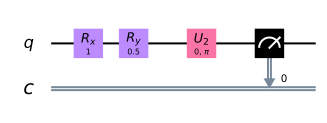

In [127]:
ansatz_circuit.draw(output='mpl')

Final Population Distribution:


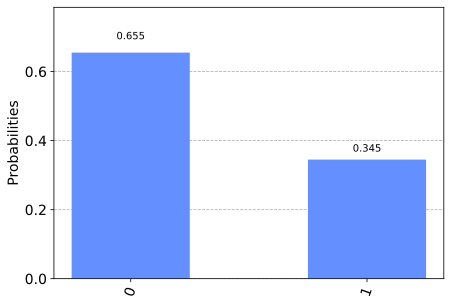

In [128]:
emulator = Aer.get_backend('qasm_simulator')
#simulate the circuit
shot_num=1000
job = execute(ansatz_circuit, emulator, shots=shot_num, memory=True)
    
print('Final Population Distribution:')
counts = job.result().get_counts()
plot_histogram(counts)